In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
mpl.rc('image', cmap='gray')
import cv2
import trackpy as tp
from matplotlib import cm
import plotly.plotly as py
from scipy.fftpack import fft
from timeit import default_timer as timer
from math import sqrt
import cv2

from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp
from matplotlib import cm
from scipy.signal import find_peaks

/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# reference on flat /without magnetic field

In [52]:
fps=1
scale=0.87*2.5


Text(0.5, 1.0, 'no magnetic field on $5^{\\circ}$  slope')

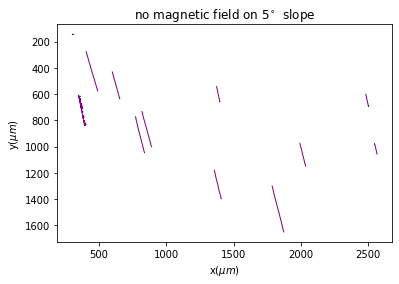

In [53]:
t_ref5d=pd.read_csv('1fps5degree_ref.csv')
t_ref5d['x']=t_ref5d['x']*scale
t_ref5d['y']=t_ref5d['y']*scale
flat_n=set(t_ref5d['particle'])
#tp.plot_traj(t_refflat)
plt.gca().invert_yaxis()
for i in flat_n:
     plt.plot(t_ref5d[t_ref5d['particle']==i] [['x']],t_ref5d[t_ref5d['particle']==i][['y']],color='purple',alpha=1,linewidth=1)
plt.xlabel("x($\mu m$) ")
plt.ylabel("y($\mu m$) ")
ax.set_aspect(1)
plt.title('no magnetic field on $5^{\circ}$  slope')

In [54]:
## reference's drift velocity
drift_vx=[]
drift_vy=[]
for i in set(t_ref5d['particle']):
    time=len(t_ref5d[t_ref5d['particle']==i])
    vec=np.diff(t_ref5d[t_ref5d['particle']==i][['x','y']].iloc[[1,-1]].values,axis=0)
    drift_vx.append(     vec[0,0]/(time/fps)    )
    drift_vy.append(     vec[0,1]/(time/fps))
del drift_vx[0]
del drift_vy[0]
driftvx=np.mean(drift_vx)
driftvy=np.mean(drift_vy)
driftv=np.sqrt(driftvx**2+driftvy**2)


In [55]:
def velocity(input):
    t1=input
    for i in set(t1['particle'].values):

        netv=np.linalg.norm(np.diff(t1[['x','y']].values,axis=0),axis=1)* fps
        netv_x=np.diff(t1['x'].values)* fps
        netv_y=np.diff(t1['y'].values)* fps
        distance=np.sum(netv)/fps
        #realframes=np.argmax(np.gradient(net2, 2)<0.09)
        #if  realframes==0:
           # realframes=t1['frame'].max()
        realframes=t1['frame'].max()
        velocity_mean=distance/((realframes+1)/fps)
    return [netv_x,netv_y, velocity_mean]

Text(0.5, 1.0, 'magnetic rotation on flat surface')

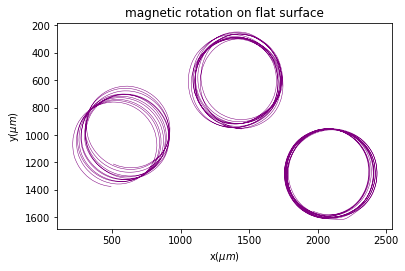

In [56]:
fps=2.4
scale=0.87*2.5
t_refflat=pd.read_csv('2.4 fps 50mflate.csv')
t_refflat=t_refflat[t_refflat['particle']!=[2]]
t_refflat=t_refflat[t_refflat['particle']!=[196]]
t_refflat=t_refflat[t_refflat['particle']!=[5]]
t_refflat=t_refflat[t_refflat['particle']!=[12]]
t_refflat=t_refflat[t_refflat['particle']!=[4]]
t_refflat=t_refflat[t_refflat['particle']!=[6]]
t_refflat=t_refflat[t_refflat['particle']!=[232]]
t_refflat['x']=t_refflat['x']*scale
t_refflat['y']=t_refflat['y']*scale
flat_n=set(t_refflat['particle'])

fig, ax = plt.subplots()
plt.gca().invert_yaxis()
#tp.plot_traj(t_refflat)
for i in flat_n:
     plt.plot(t_refflat[t_refflat['particle']==i] [['x']],t_refflat[t_refflat['particle']==i][['y']],color='purple',alpha=1,linewidth=0.5)
plt.xlabel("x($\mu m$) ")
plt.ylabel("y($\mu m$) ")
ax.set_aspect(1)
plt.title('magnetic rotation on flat surface')

Text(0.5, 0.98, 'mean circular motion velocity is 38.11 $\\mu$ m/s \n compared to drift velicty as  0.38 $\\mu$ m/s ')

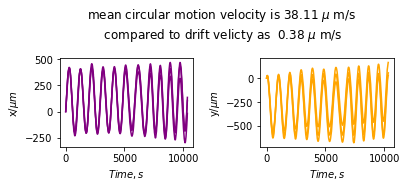

In [57]:
flat_n=set(t_refflat['particle'])
fig=plt.figure()
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.8, wspace=0.5, hspace=None)
plt.subplot(221)
for i in flat_n:
    ax1=plt.plot((t_refflat[t_refflat['particle']==i]['x']-t_refflat[t_refflat['particle']==i]['x'].iloc[0]),c='purple')
plt.xlabel("$Time,s$")
plt.ylabel("x/$\mu m$")
plt.subplot(222)
for i in flat_n:
     ax2=plt.plot((t_refflat[t_refflat['particle']==i]['y']-t_refflat[t_refflat['particle']==i]['y'].iloc[0]),c='orange')
plt.xlabel("$Time,s$")
plt.ylabel("y/$\mu m$")
mean_v=velocity(t_refflat[t_refflat['particle']==(list(flat_n)[0])])

fig.suptitle('mean circular motion velocity is %.2f $\mu$ m/s \n compared to drift velicty as  %.2f $\mu$ m/s ' %(mean_v[2],driftv))

In [61]:
t_5d1=pd.read_csv('2.4fps5degree4.csv')

In [62]:
set(t_5d1['particle'])

{0, 6, 9, 10, 11, 12, 13, 28, 43, 54, 58, 108, 114, 119}

In [63]:
t_5d1=t_5d1[t_5d1['particle'].isin([43,114,10])]

# 5 degreee

Text(0.5, 1.0, 'magnetic rotation on $5^{\\circ}$ slope')

<Figure size 432x288 with 0 Axes>

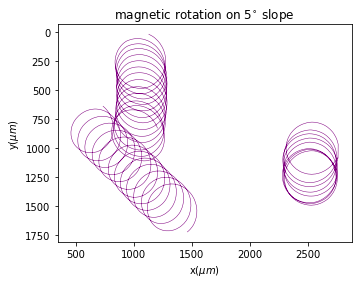

In [64]:
t_5d1=pd.read_csv('2.4fps5degree4.csv')
plt.figure()

t_5d1=t_5d1[t_5d1['particle'].isin([43,114,10])]
#t_5d1=t_5d1[t_5d1['particle']!=[50]]
t_5d1['x']=t_5d1['x']*scale
t_5d1['y']=t_5d1['y']*scale
flat_n=set(t_5d1['particle'])
fig, ax = plt.subplots()
plt.gca().invert_yaxis()
#tp.plot_traj(t_refflat)
for i in flat_n:
     plt.plot(t_5d1[t_5d1['particle']==i] [['x']],t_5d1[t_5d1['particle']==i][['y']],color='purple',alpha=1,linewidth=0.5)
plt.xlabel("x($\mu m$) ")
plt.ylabel("y($\mu m$) ")
ax.set_aspect(1)
plt.title('magnetic rotation on $5^{\circ}$ slope')

In [65]:
flat_n=[43,114,10]

Text(0.5, 1.0, 'drift velocity in magnectifeld&gravity is $V_x$=1.60 $\\mu$ m/s $V_y$=1.63 $\\mu$ m/s\n compared with           \n drift velocity in gravity is $V_x$=0.09 $\\mu$ m/s $V_y$=0.37 $\\mu$ m/s ')

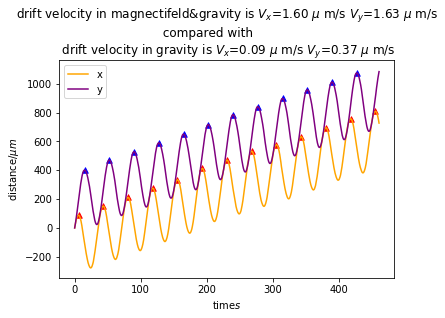

In [73]:

fig, ax = plt.subplots()

i=list(flat_n)[2]
t=np.arange(len(t_5d1[t_5d1['particle']==i]))/2.4
trac_5d1=t_5d1[t_5d1['particle']==i]
peaks1, _ = find_peaks(trac_5d1['x'].values, height=-200)
peaks2, _ = find_peaks(trac_5d1['y'].values, height=200)
          
v_xdritf=(trac_5d1['x'].values[peaks1][-1]-trac_5d1['x'].values[peaks1][0])/(t[peaks1][-1]-t[peaks1][0])
v_ydritf=(trac_5d1['y'].values[peaks2][-1]-trac_5d1['y'].values[peaks2][0])/(t[peaks2][-1]-t[peaks2][0])
    
plt.plot(t,trac_5d1['x']-trac_5d1['x'].iloc[0],c='orange',label='x')
plt.plot(t,trac_5d1['y']-trac_5d1['y'].iloc[0],c='purple',label='y')
plt.scatter(t[peaks1],(trac_5d1['x']-trac_5d1['x'].iloc[0]).values[peaks1],c='red',s=30,marker='^')
plt.scatter(t[peaks2],(trac_5d1['y']-trac_5d1['y'].iloc[0]).values[peaks2],c='blue',s=30,marker='^')
plt.legend( loc='upper left')
plt.xlabel("time$s$")
plt.ylabel("distance/$\mu m$")
plt.title('drift velocity in magnectifeld&gravity is $V_x$=%.2f $\mu$ m/s $V_y$=%.2f $\mu$ m/s\n compared with  \
         \n drift velocity in gravity is $V_x$=%.2f $\mu$ m/s $V_y$=%.2f $\mu$ m/s ' %(v_xdritf,v_ydritf,driftvx,driftvy))

Text(0.5, 1.0, 'drift velocity in magnectifeld&gravity is $V_x$=0.15 $\\mu$ m/s $V_y$=1.63 $\\mu$ m/s\n compared with           \n drift velocity in gravity is $V_x$=0.22 $\\mu$ m/s $V_y$=0.89 $\\mu$ m/s ')

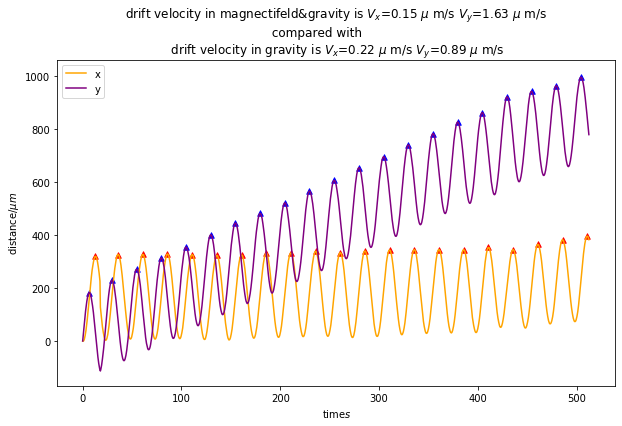

In [654]:

fig, ax = plt.subplots()

i=list(flat_n)[4]
t=np.arange(len(t_5d1[t_5d1['particle']==i]))/2.4
trac_5d1=t_5d1[t_5d1['particle']==i]
peaks1, _ = find_peaks(trac_5d1['x'].values, height=250)
peaks2, _ = find_peaks(trac_5d1['y'].values, height=200)
          
v_xdritf=(trac_5d1['x'].values[peaks1][-1]-trac_5d1['x'].values[peaks1][0])/(t[peaks1][-1]-t[peaks1][0])
v_ydritf=(trac_5d1['y'].values[peaks2][-1]-trac_5d1['y'].values[peaks2][0])/(t[peaks2][-1]-t[peaks2][0])
          
plt.plot(t,trac_5d1['x']-trac_5d1['x'].iloc[0],c='orange',label='x')
plt.plot(t,trac_5d1['y']-trac_5d1['y'].iloc[0],c='purple',label='y')
plt.scatter(t[peaks1],(trac_5d1['x']-trac_5d1['x'].iloc[0]).values[peaks1],c='red',s=30,marker='^')
plt.scatter(t[peaks2],(trac_5d1['y']-trac_5d1['y'].iloc[0]).values[peaks2],c='blue',s=30,marker='^')
plt.legend( loc='upper left')
plt.xlabel("time$s$")
plt.ylabel("distance/$\mu m$")
plt.title('drift velocity in magnectifeld&gravity is $V_x$=%.2f $\mu$ m/s $V_y$=%.2f $\mu$ m/s\n compared with  \
         \n drift velocity in gravity is $V_x$=%.2f $\mu$ m/s $V_y$=%.2f $\mu$ m/s ' %(v_xdritf,v_ydritf,driftvx,driftvy))

Text(0.5, 1.0, 'magnetic rotation on $5^{\\circ}$ slope')

<Figure size 720x432 with 0 Axes>

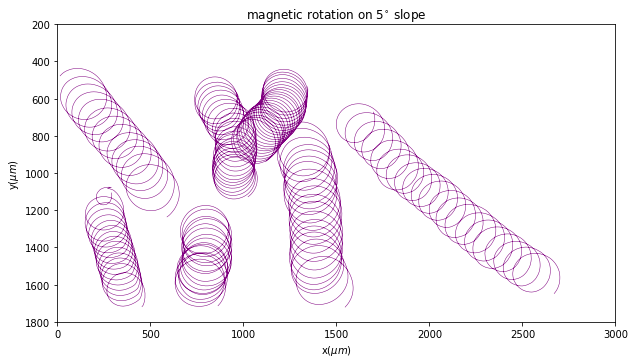

In [661]:
t_5d2=pd.read_csv('2.4fps5degree2.csv')
plt.figure()
t_5d2=t_5d2[t_5d2['particle']!=[49]]
t_5d2=t_5d2[t_5d2['particle']!=[67]]
t_5d2=t_5d2[t_5d2['particle']!=[10]]
t_5d2=t_5d2[t_5d2['particle']!=[58]]
t_5d2=t_5d2[t_5d2['particle']!=[25]]
t_5d2=t_5d2[t_5d2['particle']!=[29]]

t_5d2['x']=t_5d2['x']*scale
t_5d2['y']=t_5d2['y']*scale
flat_n=set(t_5d2['particle'])
fig, ax = plt.subplots()
plt.gca().invert_yaxis()
#tp.plot_traj(t_refflat)
for i in flat_n:
     plt.plot(t_5d2[t_5d2['particle']==i] [['x']],t_5d2[t_5d2['particle']==i][['y']],color='purple',alpha=1,linewidth=0.5)
plt.xlabel("x($\mu m$) ")
plt.ylabel("y($\mu m$) ")
plt.ylim(1800,200)
plt.xlim(0,3000)
ax.set_aspect(1)
plt.title('magnetic rotation on $5^{\circ}$ slope')

Text(0.5, 1.0, 'drift velocity in magnectifeld&gravity is $V_x$=0.27 $\\mu$ m/s $V_y$=1.54 $\\mu$ m/s\n compared with           \n drift velocity in gravity is $V_x$=0.22 $\\mu$ m/s $V_y$=0.89 $\\mu$ m/s ')

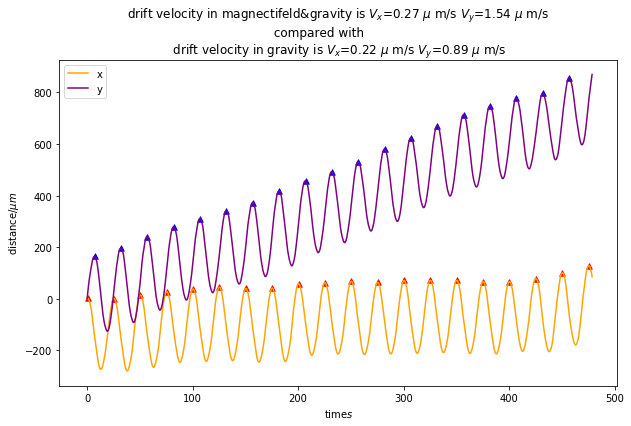

In [679]:
fig, ax = plt.subplots()

i=list(flat_n)[2]
t=np.arange(len(t_5d2[t_5d2['particle']==i]))/2.4
trac_5d2=t_5d2[t_5d2['particle']==i]
peaks1, _ = find_peaks(trac_5d2['x'].values, height=0)
peaks2, _ = find_peaks(trac_5d2['y'].values, height=0)
          
v_xdritf=(trac_5d2['x'].values[peaks1][-1]-trac_5d2['x'].values[peaks1][0])/(t[peaks1][-1]-t[peaks1][0])
v_ydritf=(trac_5d2['y'].values[peaks2][-1]-trac_5d2['y'].values[peaks2][0])/(t[peaks2][-1]-t[peaks2][0])
    
plt.plot(t,trac_5d2['x']-trac_5d2['x'].iloc[0],c='orange',label='x')
plt.plot(t,trac_5d2['y']-trac_5d2['y'].iloc[0],c='purple',label='y')
plt.scatter(t[peaks1],(trac_5d2['x']-trac_5d2['x'].iloc[0]).values[peaks1],c='red',s=30,marker='^')
plt.scatter(t[peaks2],(trac_5d2['y']-trac_5d2['y'].iloc[0]).values[peaks2],c='blue',s=30,marker='^')
plt.legend( loc='upper left')
plt.xlabel("time$s$")
plt.ylabel("distance/$\mu m$")
plt.title('drift velocity in magnectifeld&gravity is $V_x$=%.2f $\mu$ m/s $V_y$=%.2f $\mu$ m/s\n compared with  \
         \n drift velocity in gravity is $V_x$=%.2f $\mu$ m/s $V_y$=%.2f $\mu$ m/s ' %(v_xdritf,v_ydritf,driftvx,driftvy))

In [ ]:
fig, ax = plt.subplots()

i=list(flat_n)[1]
t=np.arange(len(t_5d1[t_5d1['particle']==i]))/2.4
trac_5d1=t_5d1[t_5d1['particle']==i]
          
plt.plot(t,trac_5d1['x']-trac_5d1['x'].iloc[0],c='orange',label='x')
plt.plot(t,trac_5d1['y']-trac_5d1['y'].iloc[0],c='purple',label='y')
plt.legend( loc='upper left')
plt.xlabel("time$s$")
plt.ylabel("distance/$\mu m$")

Text(0.5, 1.0, 'magnetic rotation on $5^{\\circ}$ slope')

<Figure size 432x288 with 0 Axes>

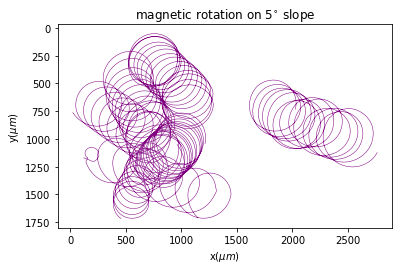

In [549]:
t_5d3=pd.read_csv('2.4fps5degree3.csv')
plt.figure()
t_5d3=t_5d3[t_5d3['particle']!=[70]]
t_5d3=t_5d3[t_5d3['particle']!=[10]]
t_5d3=t_5d3[t_5d3['particle']!=[62]]
t_5d3=t_5d3[t_5d3['particle']!=[11]]
t_5d3=t_5d3[t_5d3['particle']!=[15]]

t_5d3['x']=t_5d3['x']*scale
t_5d3['y']=t_5d3['y']*scale
flat_n=set(t_5d3['particle'])
fig, ax = plt.subplots()
plt.gca().invert_yaxis()
#tp.plot_traj(t_refflat)
for i in flat_n:
     plt.plot(t_5d3[t_5d3['particle']==i] [['x']],t_5d3[t_5d3['particle']==i][['y']],color='purple',alpha=1,linewidth=0.5)
plt.xlabel("x($\mu m$) ")
plt.ylabel("y($\mu m$) ")
ax.set_aspect(1)
plt.title('magnetic rotation on $5^{\circ}$ slope')

Text(0.5, 1.0, 'magnetic rotation on $5^{\\circ}$ slope')

<Figure size 432x288 with 0 Axes>

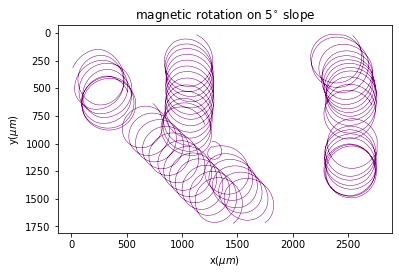

In [548]:
t_5d4=pd.read_csv('2.4fps5degree4.csv')
plt.figure()
t_5d4=t_5d4[t_5d4['particle']!=[0]]
t_5d4=t_5d4[t_5d4['particle']!=[6]]
t_5d4=t_5d4[t_5d4['particle']!=[11]]
t_5d4=t_5d4[t_5d4['particle']!=[12]]
t_5d4=t_5d4[t_5d4['particle']!=[13]]
t_5d4=t_5d4[t_5d4['particle']!=[28]]
t_5d4=t_5d4[t_5d4['particle']!=[9]]
t_5d4=t_5d4[t_5d4['particle']!=[108]]
t_5d4['x']=t_5d4['x']*scale
t_5d4['y']=t_5d4['y']*scale
flat_n=set(t_5d4['particle'])
fig, ax = plt.subplots()
plt.gca().invert_yaxis()
#tp.plot_traj(t_refflat)
for i in flat_n:
     plt.plot(t_5d4[t_5d4['particle']==i] [['x']],t_5d4[t_5d4['particle']==i][['y']],color='purple',alpha=1,linewidth=0.5)
plt.xlabel("x($\mu m$) ")
plt.ylabel("y($\mu m$) ")
ax.set_aspect(1)
plt.title('magnetic rotation on $5^{\circ}$ slope')

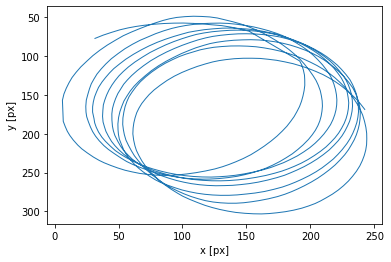

108

In [340]:
i=2
t_test=t_5d4[t_5d4['particle']==list(set(t_5d4['particle']))[i]]
tp.plot_traj(t_test);
list(set(t_5d4['particle']))[i]